<a href="https://colab.research.google.com/github/eduardocs2001/Analise_de_risco_de_credito/blob/main/An%C3%A1lise_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NAIVE BAYES


O algoritmo “Naive Bayes” é um classificador probabilístico baseado no “Teorema de Bayes”, o qual foi criado por Thomas Bayes (1701 - 1761) para tentar provar a existência de Deus. Atualmente, o algoritmo se tornou popular na área de Aprendizado de Máquina (Machine Learning) para categorizar textos baseado na frequência das palavras usadas, e assim pode ser usado para identificar se determinado e-mail é um SPAM ou sobre qual assunto se refere determinado texto, por exemplo. Por ser muito simples e rápido, possui um desempenho relativamente maior do que outros classificadores. Além disso, o Naive Bayes só precisa de um pequeno número de dados de teste para concluir classificações com uma boa precisão.

Neste projeto irei usar um banco de dados públicos, do site Kaggle, onde será criado um algoritmo para fazer a previsão se o cliente irá pagar ou não seu empréstimo


In [1]:
#bibliotecas a ser usadas:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

link da base de dados (adaptado) -> https://www.kaggle.com/laotse/credit-risk-dataset


In [2]:
#importando a base de dados
base_credito = pd.read_csv('/content/drive/MyDrive/credit_data.csv')

In [5]:
#visualização da base de dados
base_credito

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [6]:
#descrição
base_credito.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


visualização dos dados:

In [8]:
#verificar quantos registro estão como pagos (0), e quantos como pendentes (1)
np.unique(base_credito['default'], return_counts=True)

#1717 registros pagos
#283 resgistros pendentes (dívida aberta)

(array([0, 1]), array([1717,  283]))

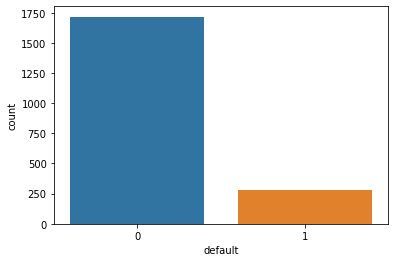

In [9]:
#gráfico da relação da quantidade de registros pagos (0) e pendentes (1)
sns.countplot(x = base_credito['default']);

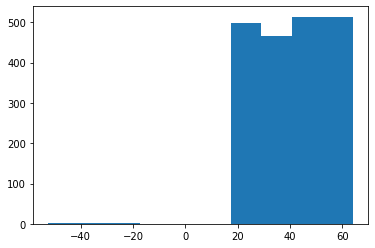

In [10]:
#gráfico da relação de pessoas por idade
plt.hist(x = base_credito['age']);

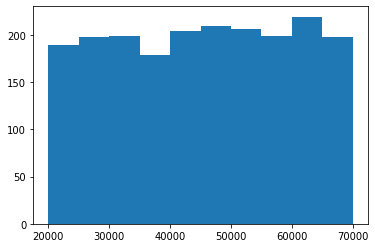

In [11]:
#gráfico da relação de pessoas por renda
plt.hist(x = base_credito['income']);

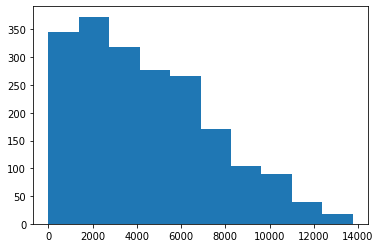

In [12]:
#gráfico da relação de pessoas por valor do empréstimo
plt.hist(x = base_credito['loan']);

Tratamento dos valores inconsistentes

In [13]:
#localizar valores onde a idade é negativa
base_credito.loc[base_credito['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [14]:
# Apagar somente os registros com valores inconsistentes
base_credito1 = base_credito.drop(base_credito[base_credito['age'] < 0].index)
base_credito1

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [15]:
#nova base de dados com os valores negativos excluidos
base_credito1.loc[base_credito1['age'] < 0]

,clientid,income,age,loan,default


In [16]:
#Prencher a média
base_credito['age'].mean()
# O resultado é a média das idade, onde se é o mais indicado a utilizar, pelo fato de não 
# haver perca de dados, nem alterar o resultado final

40.80755937840458

In [17]:
#aqui estou alterando todos os valores negativos pela média
base_credito.loc[base_credito['age'] < 0, 'age'] = 40.92

In [18]:
#consulta mostrando que não existe dados negativos
base_credito.loc[base_credito['age'] < 0]

,clientid,income,age,loan,default


In [19]:
#consulta mostrando os antigos valores que eram negativo e agora contém a média
base_credito.loc[base_credito['age'] == 40.92]

,clientid,income,age,loan,default
15,16,50501.726689,40.92,3977.287432,0
21,22,32197.620701,40.92,4244.057136,0
26,27,63287.038908,40.92,9595.286289,0


Esclarecendo que este método só é usado quando não é possível entrar em contato com o cliente para atualização dos dados 

Tratamento de valores faltantes

In [20]:
#Se não for possível atualizar os dados diretamente com o cliente, usaremos a média!
base_credito.isnull()

#True = faltante
#false = não falta

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [21]:
#faz a soma por coluna de quantos valores estão na falta
base_credito.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [22]:
#localiza os valores que estão na falta
base_credito.loc[pd.isnull(base_credito['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [23]:
#altera pela média os valores que estão na falta
base_credito['age'].fillna(base_credito['age'].mean(), inplace = True)

In [24]:
#banco de dados sem os valores nulos
base_credito.loc[pd.isnull(base_credito['age'])]

,clientid,income,age,loan,default


In [25]:
#dados que foram alterados com a média
base_credito.loc[base_credito['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


#Divisão entre previsores e classes

Previsores são os dados que serão usados como base para prever a classe de novos registros classe é a resposta que desejo, como se um novo cliente irá pagar ou não o empréstimo que está solicitando 


In [26]:
# x = previsores
X_credito = base_credito.iloc[:, 1:4].values

In [27]:
#os dados são retornados no formato numpy
X_credito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [28]:
y_credito = base_credito.iloc[:, 4].values

In [29]:
y_credito

array([0, 0, 0, ..., 1, 0, 0])

Escalonamento de valores¶

todos valores precisam estar na mesma escala pelo fato das multiplicações realizada, assim para não super valorizar os valores maiores


In [30]:
#minha base de dados previsores
X_credito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [31]:
#menor valor de cada coluna
X_credito[:,0].min(), X_credito[:,1].min(), X_credito[:,2].min()

#percebe-se a diferença na escala de valores

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [32]:
#maior valor de cada coluna
X_credito[:,0].max(), X_credito[:,1].max(), X_credito[:,2].max()

(69995.6855783239, 63.97179584112021, 13766.051239333701)

In [33]:
#agora irei importar a biblioteca sklearn que é usada para tratar os dados, assim colocando
# todos na mesma escala

from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credito)

In [34]:
#menor valor de cada coluna
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [35]:
#maior valor de cada coluna
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(1.7220222385319197, 1.7393673928651971, 3.0616609141708273)

In [36]:
# tabela após tratada
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

#Divisão das bases de treinamento e teste

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#agora irei dividir a base de dados em duas, sendo 75% para treinamento e 25% para teste
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credito, test_size = 0.25, random_state = 0)

In [39]:
#quantidade de dados em cada parte da tabela
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [40]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

#NAIVE BAYES

In [41]:
#importando a biblioteca que realizara o treinamento
from sklearn.naive_bayes import GaussianNB

In [42]:
#realizando o treinamento
naive_credito_data = GaussianNB()
naive_credito_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
#fazendo o teste
previsoes = naive_credito_data.predict(X_credit_teste)

In [44]:
#resultados que o algoritimo me devolveu onde 0 = paga e 1 = não paga
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
#aqui e os resultados verdadeiros, usado para testar a eficasia do algoritimo
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
#verificando a porcentagem de acertos 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
accuracy_score(y_credit_teste, previsoes)

0.938

verificou-se que o algoritimo acertou 93,8% das previsõe

#analisando o resultado:

In [48]:
from yellowbrick.classifier import ConfusionMatrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



0.938

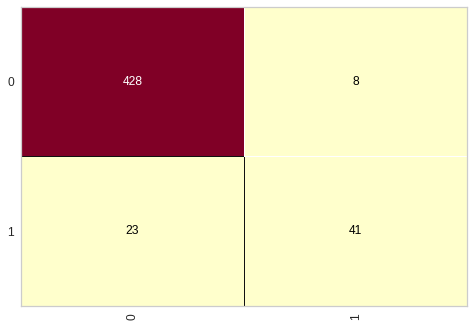

In [49]:
cm = ConfusionMatrix(naive_credito_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

neste exemplo a cima percebesse os acertos e os erros do algoritimo, onde interseção de numeros iguais são os resultados certos